<a href="https://colab.research.google.com/github/omssahay28/Big-Data-Analysis-Covid-19-in-India/blob/main/Renewable_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
  Region       States  Max.Demand Met during the day(MW)  \
0    NER      Mizoram                                 77   
1     WR           DD                                214   
2     WR          Goa                                383   
3     WR  Maharashtra                              14837   
4     WR           MP                               5740   

   Shortage during maximum Demand(MW)  Energy Met (MU)        date  
0                                 1.0              1.2  01-01-2015  
1                                 0.0              4.8  01-01-2015  
2                                 0.0              7.3  01-01-2015  
3                                57.0            315.0  01-01-2015  
4                                 0.0            109.8  01-01-2015  
Adding 'Date' column to the dataset...

Data Cleaning and Preprocessing...

Performing EDA...
Required columns for EDA (Date and Total Renewable Energy) are missing.

Preparing data for clustering...

Applyi

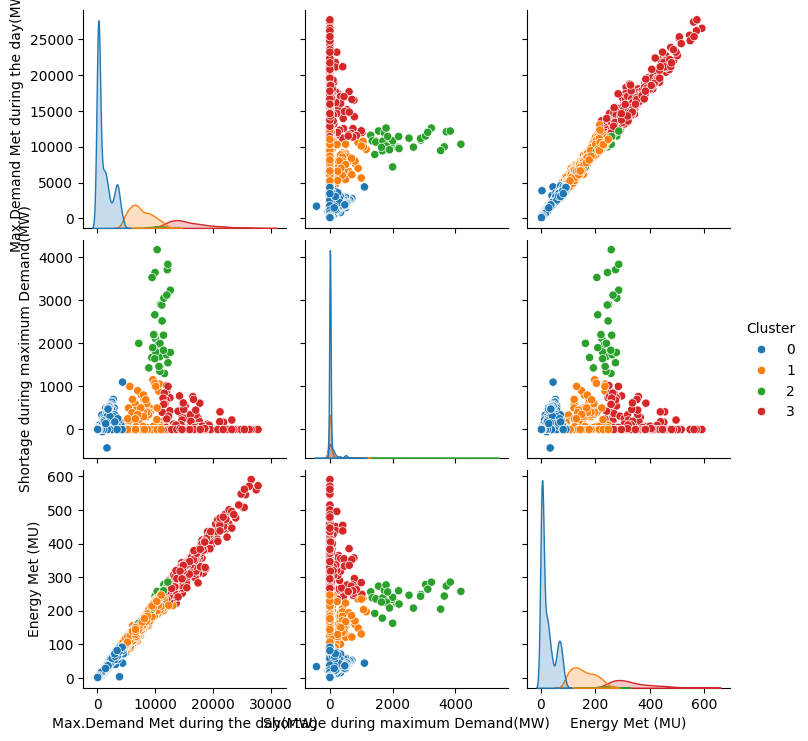

Processed dataset saved to /content/Statewise.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the dataset
data_path = '/content/Statewise.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Add 'Date' column if missing and populate with valid dates
if 'Date' not in df.columns:
    print("Adding 'Date' column to the dataset...")
    try:
        start_date = '2015-01-01'
        end_date = '2022-12-31'
        num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
        if len(df) <= num_days:
            df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='D')
        else:
            dates = pd.date_range(start=start_date, end=end_date, freq='D')
            df = df.iloc[:len(dates)]
            df['Date'] = dates
    except Exception as e:
        print(f"Error creating 'Date' column: {e}")

# Preprocessing
print("\nData Cleaning and Preprocessing...")
# Handle missing values separately for numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

# Converting dates (if applicable)
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)
    except Exception as e:
        print(f"Error processing 'Date' column: {e}")

# Exploratory Data Analysis (EDA)
print("\nPerforming EDA...")
if 'Date' in df.columns and 'Total Renewable Energy' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Total Renewable Energy', label='Renewable Energy Growth')
    plt.title('Trend of Renewable Energy Over Time')
    plt.xlabel('Date')
    plt.ylabel('Energy (MWh)')
    plt.legend()
    plt.show()
else:
    print("Required columns for EDA (Date and Total Renewable Energy) are missing.")

# Visualization for Maximum Demand Met
if 'Date' in df.columns and 'Maximum Demand Met' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Maximum Demand Met', label='Maximum Demand Met')
    plt.title('Trend of Maximum Demand Met Over Time')
    plt.xlabel('Date')
    plt.ylabel('Maximum Demand (MWh)')
    plt.legend()
    plt.show()

# Visualization for Shortage During Maximum Demand
if 'Date' in df.columns and 'Shortage During Maximum Demand' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Shortage During Maximum Demand', label='Shortage During Maximum Demand', color='red')
    plt.title('Trend of Shortage During Maximum Demand Over Time')
    plt.xlabel('Date')
    plt.ylabel('Shortage (MWh)')
    plt.legend()
    plt.show()

# Visualization for Energy Met
if 'Date' in df.columns and 'Energy Met' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Energy Met', label='Energy Met', color='green')
    plt.title('Trend of Energy Met Over Time')
    plt.xlabel('Date')
    plt.ylabel('Energy Met (MWh)')
    plt.legend()
    plt.show()

# Visualization for Statewise Distribution
if 'State' in df.columns and 'Total Renewable Energy' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='State', y='Total Renewable Energy', ci=None, palette='viridis')
    plt.title('Statewise Renewable Energy Distribution')
    plt.xlabel('State')
    plt.ylabel('Total Renewable Energy (MWh)')
    plt.xticks(rotation=90)
    plt.show()

# Visualization for Yearwise Trends
if 'Date' in df.columns and 'Total Renewable Energy' in df.columns:
    df['Year'] = df['Date'].dt.year
    yearwise_data = df.groupby('Year').sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearwise_data, x='Year', y='Total Renewable Energy', marker='o', label='Total Renewable Energy')
    plt.title('Yearwise Renewable Energy Trends')
    plt.xlabel('Year')
    plt.ylabel('Total Renewable Energy (MWh)')
    plt.legend()
    plt.show()

# Comparative visualization of Energy Demand and Supply
if {'State', 'Maximum Demand Met', 'Energy Met'}.issubset(df.columns):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df, x='State', y='Maximum Demand Met', color='blue', alpha=0.6, label='Maximum Demand Met')
    sns.barplot(data=df, x='State', y='Energy Met', color='green', alpha=0.6, label='Energy Met')
    plt.title('Comparison of Energy Demand and Supply by State')
    plt.xlabel('State')
    plt.ylabel('Energy (MWh)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Stacked bar chart for Renewable Energy and Total Energy
if {'State', 'Total Renewable Energy', 'Energy Met'}.issubset(df.columns):
    renewable_share = df.groupby('State').sum().reset_index()
    plt.figure(figsize=(14, 8))
    plt.bar(renewable_share['State'], renewable_share['Energy Met'], label='Total Energy Met', color='gray')
    plt.bar(renewable_share['State'], renewable_share['Total Renewable Energy'], label='Renewable Energy', color='green')
    plt.title('Statewise Comparison of Renewable and Total Energy')
    plt.xlabel('State')
    plt.ylabel('Energy (MWh)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Prepare data for clustering
print("\nPreparing data for clustering...")
# Selecting numerical columns for clustering
numerical_features = df.select_dtypes(include=[np.number]).columns
clustering_data = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
print("\nApplying KMeans Clustering...")
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Silhouette Analysis
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for KMeans clustering: {silhouette_avg}")

# Visualization of Clusters
print("\nVisualizing clusters...")
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Time Series Analysis
if 'Date' in df.columns and 'Total Renewable Energy' in df.columns:
    print("\nPerforming Time Series Analysis...")
    df.set_index('Date', inplace=True)
    resampled_df = df.resample('M').mean()
    resampled_df[['Total Renewable Energy']].plot(figsize=(12, 6))
    plt.title('Monthly Average Renewable Energy')
    plt.ylabel('Energy (MWh)')
    plt.show()

# Save processed data to a new file
output_path = '/content/Statewise.csv'
df.to_csv(output_path, index=False)
print(f"Processed dataset saved to {output_path}")


Dataset Overview:
  Region       States  Max.Demand Met during the day(MW)  \
0    NER      Mizoram                                 77   
1     WR           DD                                214   
2     WR          Goa                                383   
3     WR  Maharashtra                              14837   
4     WR           MP                               5740   

   Shortage during maximum Demand(MW)  Energy Met (MU)       date  \
0                                 1.0              1.2 2015-01-01   
1                                 0.0              4.8 2015-01-01   
2                                 0.0              7.3 2015-01-01   
3                                57.0            315.0 2015-01-01   
4                                 0.0            109.8 2015-01-01   

   Total Renewable Energy  
0                    0.36  
1                    1.44  
2                    2.19  
3                   94.50  
4                   32.94  

Data Cleaning and Preprocessing...
Su

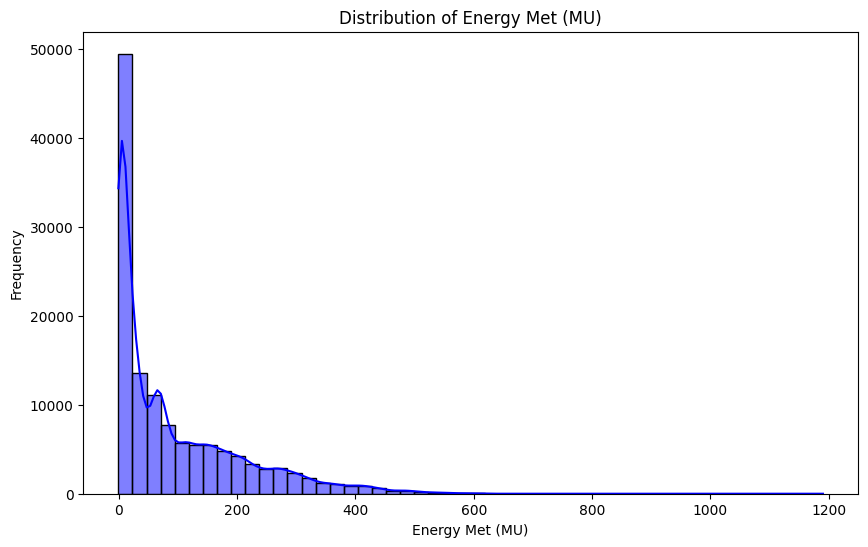

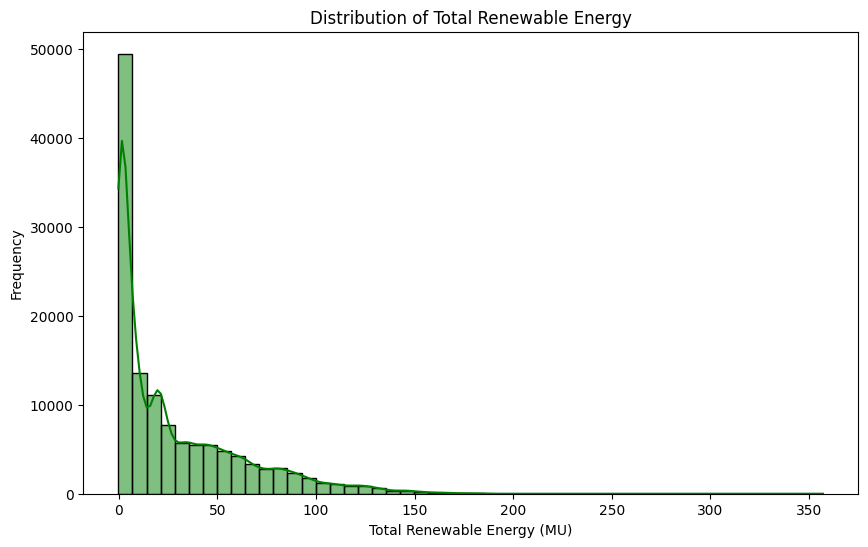

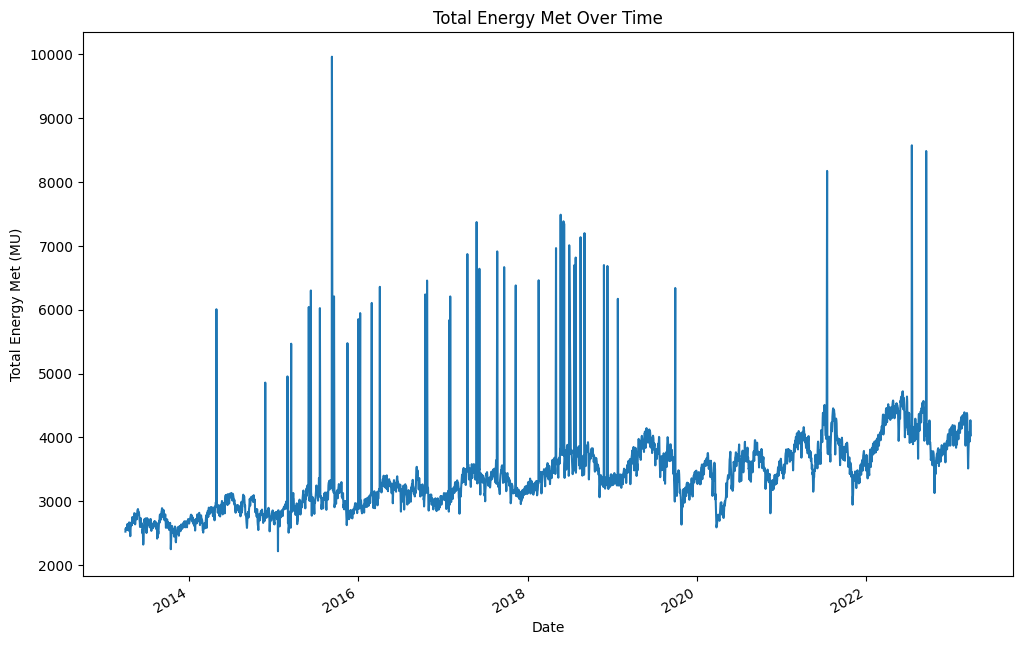

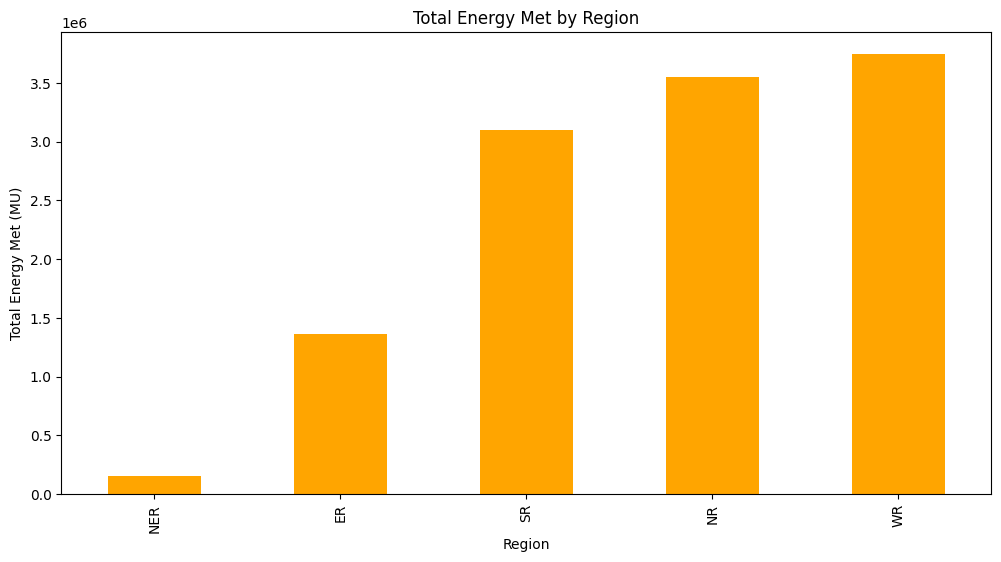

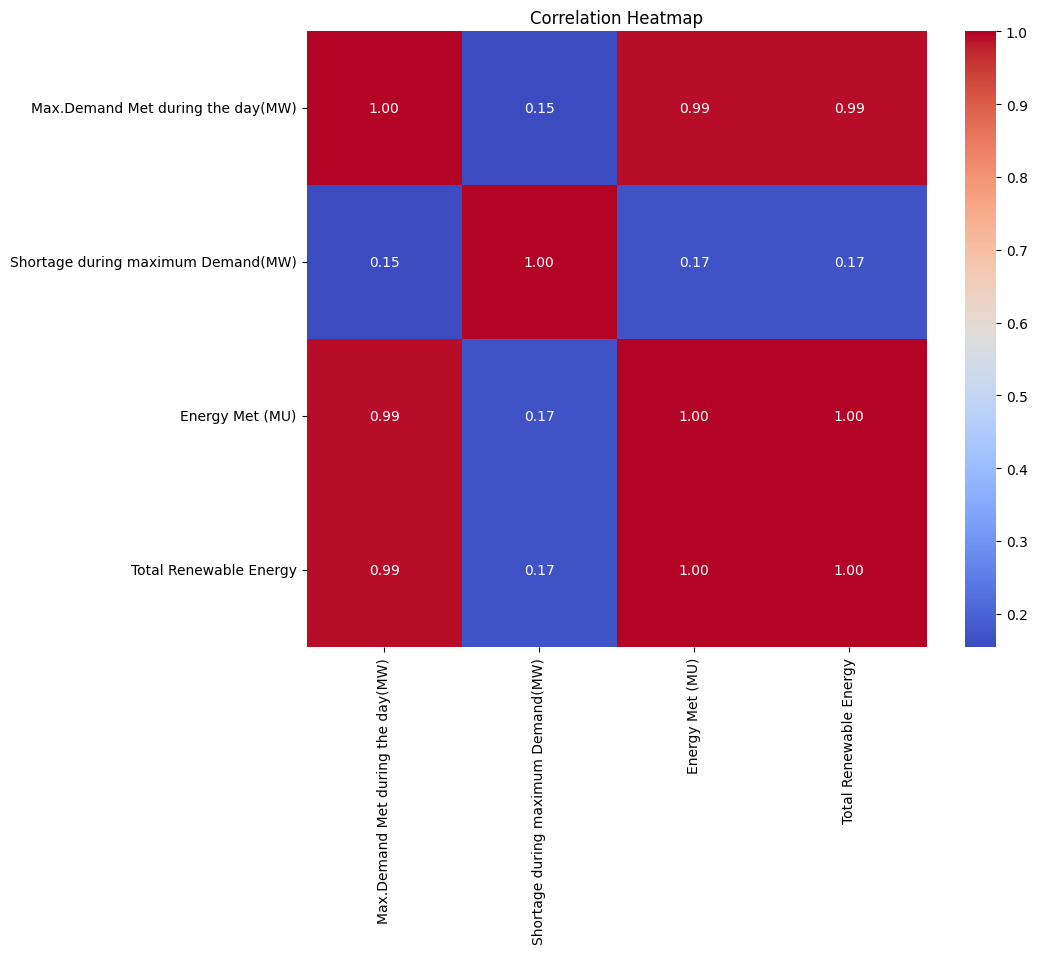

<ipython-input-21-14bc2861a274>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Energy Met (MU)', palette='Set2')


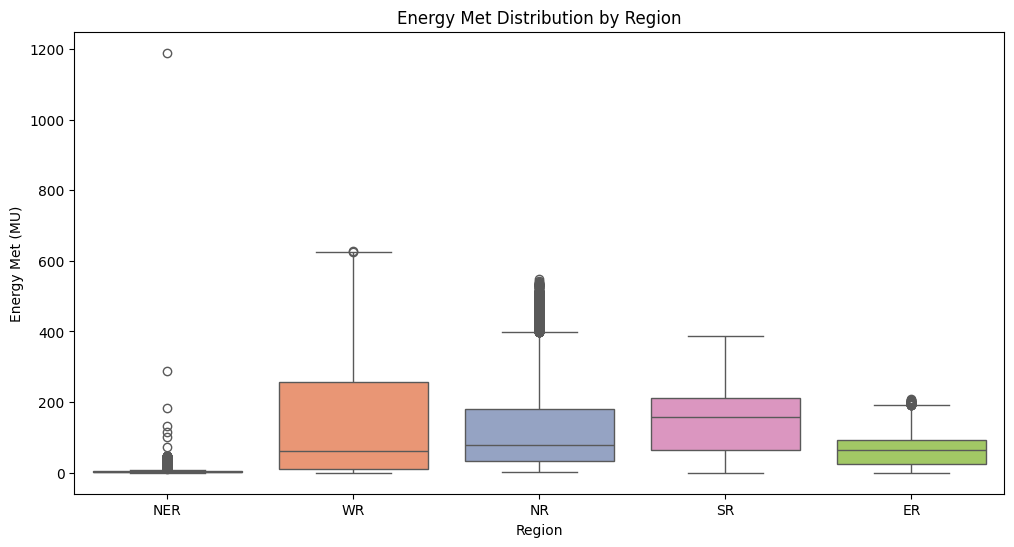

<ipython-input-21-14bc2861a274>:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shortage during maximum Demand(MW)'].fillna(df['Shortage during maximum Demand(MW)'].mean(), inplace=True)
<ipython-input-21-14bc2861a274>:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Preparing data for clustering...

Applying KMeans Clustering...
Silhouette Score for KMeans clustering: 0.6286956348745458

Visualizing clusters...


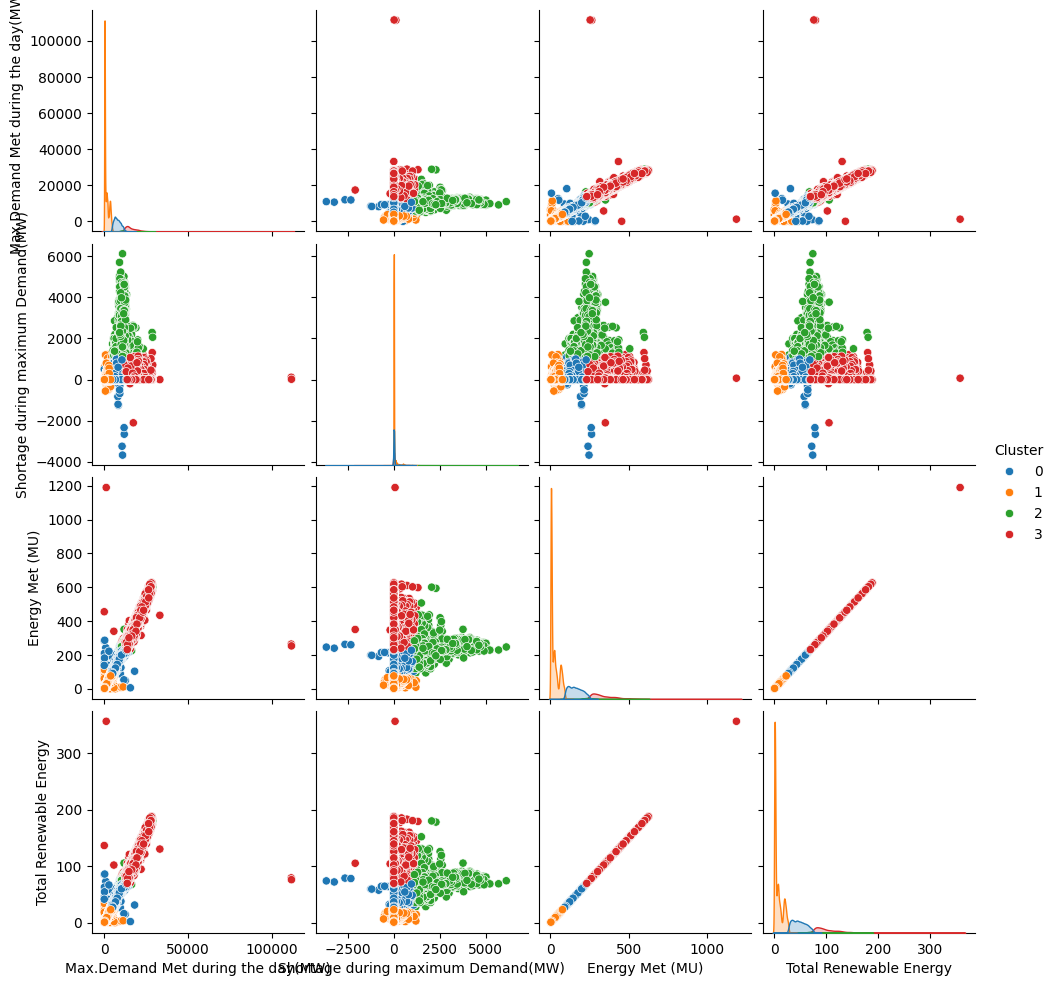

Processed dataset saved to /content/Updated_Statewise.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the dataset
data_path = '/content/Updated_Statewise.csv'
df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])
# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Preprocessing
print("\nData Cleaning and Preprocessing...")
# Handle missing values separately for numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

# Converting dates (if applicable)
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)
    except Exception as e:
        print(f"Error processing 'Date' column: {e}")


# Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution Plots
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Met (MU)'], kde=True, bins=50, color='blue')
plt.title('Distribution of Energy Met (MU)')
plt.xlabel('Energy Met (MU)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Renewable Energy'], kde=True, bins=50, color='green')
plt.title('Distribution of Total Renewable Energy')
plt.xlabel('Total Renewable Energy (MU)')
plt.ylabel('Frequency')
plt.show()

# Trends Over Time
plt.figure(figsize=(12, 8))
df.groupby('date')['Energy Met (MU)'].sum().plot()
plt.title('Total Energy Met Over Time')
plt.xlabel('Date')
plt.ylabel('Total Energy Met (MU)')
plt.show()

# Regional Analysis
plt.figure(figsize=(12, 6))
region_energy = df.groupby('Region')['Energy Met (MU)'].sum().sort_values()
region_energy.plot(kind='bar', color='orange')
plt.title('Total Energy Met by Region')
plt.xlabel('Region')
plt.ylabel('Total Energy Met (MU)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['Max.Demand Met during the day(MW)', 'Shortage during maximum Demand(MW)',
                    'Energy Met (MU)', 'Total Renewable Energy']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Energy Met (MU)', palette='Set2')
plt.title('Energy Met Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Energy Met (MU)')
plt.show()

# Handle Missing Values (if required, example with mean imputation)
df['Shortage during maximum Demand(MW)'].fillna(df['Shortage during maximum Demand(MW)'].mean(), inplace=True)
df['Energy Met (MU)'].fillna(df['Energy Met (MU)'].mean(), inplace=True)
df['Total Renewable Energy'].fillna(df['Total Renewable Energy'].mean(), inplace=True)



# Visualization for Maximum Demand Met
if 'Date' in df.columns and 'Maximum Demand Met' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Maximum Demand Met', label='Maximum Demand Met')
    plt.title('Trend of Maximum Demand Met Over Time')
    plt.xlabel('Date')
    plt.ylabel('Maximum Demand (MWh)')
    plt.legend()
    plt.show()

# Visualization for Shortage During Maximum Demand
if 'Date' in df.columns and 'Shortage During Maximum Demand' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Shortage During Maximum Demand', label='Shortage During Maximum Demand', color='red')
    plt.title('Trend of Shortage During Maximum Demand Over Time')
    plt.xlabel('Date')
    plt.ylabel('Shortage (MWh)')
    plt.legend()
    plt.show()

# Visualization for Energy Met
if 'Date' in df.columns and 'Energy Met' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Energy Met', label='Energy Met', color='green')
    plt.title('Trend of Energy Met Over Time')
    plt.xlabel('Date')
    plt.ylabel('Energy Met (MWh)')
    plt.legend()
    plt.show()

# Visualization for Statewise Distribution
if 'State' in df.columns and 'Total Renewable Energy' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='State', y='Total Renewable Energy', ci=None, palette='viridis')
    plt.title('Statewise Renewable Energy Distribution')
    plt.xlabel('State')
    plt.ylabel('Total Renewable Energy (MWh)')
    plt.xticks(rotation=90)
    plt.show()

# Visualization for Yearwise Trends
if 'Date' in df.columns and 'Total Renewable Energy' in df.columns:
    df['Year'] = df['Date'].dt.year
    yearwise_data = df.groupby('Year').sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearwise_data, x='Year', y='Total Renewable Energy', marker='o', label='Total Renewable Energy')
    plt.title('Yearwise Renewable Energy Trends')
    plt.xlabel('Year')
    plt.ylabel('Total Renewable Energy (MWh)')
    plt.legend()
    plt.show()

# Comparative visualization of Energy Demand and Supply
if {'State', 'Maximum Demand Met', 'Energy Met'}.issubset(df.columns):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df, x='State', y='Maximum Demand Met', color='blue', alpha=0.6, label='Maximum Demand Met')
    sns.barplot(data=df, x='State', y='Energy Met', color='green', alpha=0.6, label='Energy Met')
    plt.title('Comparison of Energy Demand and Supply by State')
    plt.xlabel('State')
    plt.ylabel('Energy (MWh)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Stacked bar chart for Renewable Energy and Total Energy
if {'State', 'Total Renewable Energy', 'Energy Met'}.issubset(df.columns):
    renewable_share = df.groupby('State').sum().reset_index()
    plt.figure(figsize=(14, 8))
    plt.bar(renewable_share['State'], renewable_share['Energy Met'], label='Total Energy Met', color='gray')
    plt.bar(renewable_share['State'], renewable_share['Total Renewable Energy'], label='Renewable Energy', color='green')
    plt.title('Statewise Comparison of Renewable and Total Energy')
    plt.xlabel('State')
    plt.ylabel('Energy (MWh)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Prepare data for clustering
print("\nPreparing data for clustering...")
# Selecting numerical columns for clustering
numerical_features = df.select_dtypes(include=[np.number]).columns
clustering_data = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
print("\nApplying KMeans Clustering...")
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Silhouette Analysis
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for KMeans clustering: {silhouette_avg}")

# Visualization of Clusters
print("\nVisualizing clusters...")
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Time Series Analysis
if 'Date' in df.columns and 'Total Renewable Energy' in df.columns:
    print("\nPerforming Time Series Analysis...")
    df.set_index('Date', inplace=True)
    resampled_df = df.resample('M').mean()
    resampled_df[['Total Renewable Energy']].plot(figsize=(12, 6))
    plt.title('Monthly Average Renewable Energy')
    plt.ylabel('Energy (MWh)')
    plt.show()

# Save processed data to a new file
output_path = '/content/Updated_Statewise.csv'
df.to_csv(output_path, index=False)
print(f"Processed dataset saved to {output_path}")
